### Pipeline gerarchica - Multicollasso

In [1]:
import collections
import networkx as nx
from grandiso import find_motifs
from operator import itemgetter

In [2]:
%load_ext pycodestyle_magic
# %%pycodestyle

#### Grafo test di base `G`

In [3]:
# grafo test di base G

G0 = nx.Graph()
G0.add_edges_from([(7, 1), (8, 1), (7, 8), (1, 2), (2, 3), (2, 4), (2, 5), (4, 5), (3, 6), (4, 6), (5, 6)])
# nx.draw(G0)

#### Sottografo `motif`

In [4]:
# Sottografo motif da trovare nel grafo G: TRIANGOLO

motif = nx.Graph()
motif.add_edges_from([(1, 2), (2, 3), (3, 1)])
# nx.draw(motif)

#### Rinomina grafo  `G`

In [4]:
def rinomina(G):
    livello = 0
    nodi = list(G.nodes())
    lun = len(nodi)
    liv_list = [livello for x in range(lun)]
    lista_tuple = list(zip(liv_list, nodi))
    mapping = dict(zip(nodi, lista_tuple))
    G = nx.relabel_nodes(G, mapping)
    
    return G

In [ ]:
G0 = rinomina(G0)

#### Nodi grafo  `G`

In [5]:
# lista dei nodi:
nodi = list(G0.nodes())
nodi.sort(key=lambda x:x[1])
nodi

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8)]

#### Identify `motif` in `G`

In [6]:
def identify(motif, G):
    lista1 = find_motifs(motif, G)
    if lista1 == []:
        return lista1
    else:
        lista2 = [list(d.values()) for d in lista1]
        lista3 = list(set(tuple(sorted(s)) for s in lista2))
        lista4 = sorted(lista3)
        risultato = [list(el) for el in lista4]

        return risultato

In [13]:
ris = identify(motif, G0)
ris = sorted(ris)
ris

[[(0, 1), (0, 7), (0, 8)], [(0, 2), (0, 4), (0, 5)], [(0, 4), (0, 5), (0, 6)]]

In [14]:
# primo triangolo

ris[0]

[(0, 1), (0, 7), (0, 8)]

In [15]:
# primo nodo

ris[0][0]

(0, 1)

In [16]:
# soluzione più veloce

max_liv = max(ris[0], key=itemgetter(0))[0]
max_liv

0

In [17]:
# altra soluzione
# max_liv = max(ris[0], key=lambda item:item[0])[0]

In [7]:
def funzione(results, nodes):
    max_liv = max(results[0], key=itemgetter(0))[0]
    lista_temp = []
    tri = []
    for x in nodes:
        if x in results[0]:
            # sostituisci il livello del primo nodo ??? è corretto ???
            # (per comodità scelgo il primo) con il MAX+1
            x = list(x)
            x[0] = max_liv+1
            x = tuple(x)
            tri.append(x)
    # avevo messo 3
    if len(tri) == len(results[0]):
        for x in nodes:
            if x in results[0]:
                lista_temp.append(tri[0])
            else:
                lista_temp.append(x)
        mapping = dict(zip(nodes, lista_temp))
        
        return mapping

    else:
        mapping = []
        return mapping



In [21]:
mapping = funzione(ris, nodi)
mapping

{(0, 1): (1, 1),
 (0, 2): (0, 2),
 (0, 3): (0, 3),
 (0, 4): (0, 4),
 (0, 5): (0, 5),
 (0, 6): (0, 6),
 (0, 7): (1, 1),
 (0, 8): (1, 1)}

In [48]:
# PROVA

max_liv = max(ris[0], key=itemgetter(0))[0]
lista_temp = []
tri = []
for x in nodi:
    if x in ris[0]:
        # sostituisci il livello del primo nodo ??? è corretto ???
        # (per comodità scelgo il primo) con il MAX+1
        x = list(x)
        x[0] = max_liv+1
        x = tuple(x)
        tri.append(x)
for x in nodi:
    if x in ris[0]:
        lista_temp.append(tri[0])
    else:
        lista_temp.append(x)

mapping = dict(zip(nodi, lista_temp))
mapping

{(0, 1): (1, 1),
 (0, 2): (0, 2),
 (0, 3): (0, 3),
 (0, 4): (0, 4),
 (0, 5): (0, 5),
 (0, 6): (0, 6),
 (0, 7): (1, 1),
 (0, 8): (1, 1)}

In [22]:
G1 = nx.relabel_nodes(G0, mapping)
G1.nodes()

NodeView(((1, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)))

In [23]:
nodi1 = list(G1.nodes()) 
nodi1.sort(key=lambda x:x[1])
nodi1

[(1, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)]

In [24]:
#ris1 = ris.pop(0)
#ris1

In [25]:
del ris[0]
ris

[[(0, 2), (0, 4), (0, 5)], [(0, 4), (0, 5), (0, 6)]]

In [26]:
mapping1 = funzione(ris, nodi1)
mapping1

{(1, 1): (1, 1),
 (0, 2): (1, 2),
 (0, 3): (0, 3),
 (0, 4): (1, 2),
 (0, 5): (1, 2),
 (0, 6): (0, 6)}

In [27]:
G2 = nx.relabel_nodes(G1, mapping1)
G2.nodes()

NodeView(((1, 1), (1, 2), (0, 3), (0, 6)))

In [28]:
nodi2 = list(G2.nodes()) 
nodi2.sort(key=lambda x:x[1])
nodi2

[(1, 1), (1, 2), (0, 3), (0, 6)]

In [29]:
del ris[0]
ris

[[(0, 4), (0, 5), (0, 6)]]

In [30]:
ris

[[(0, 4), (0, 5), (0, 6)]]

In [31]:
nodi2

[(1, 1), (1, 2), (0, 3), (0, 6)]

In [32]:
mapping2 = funzione(ris, nodi2)
mapping2

[]

In [33]:
# lista di triangoli trovati

ris1 = identify(motif, G2)
#ris1 = sorted(ris1)
ris1

[[(0, 3), (0, 6), (1, 2)]]

In [34]:
ris1 = ris1[0]
ris1.sort(key=lambda x:x[1])
ris1 = [ris1]

In [35]:
ris1

[[(1, 2), (0, 3), (0, 6)]]

In [36]:
nodi2

[(1, 1), (1, 2), (0, 3), (0, 6)]

In [37]:
len(ris1[0])

3

In [104]:
# NO RUN

def funzione(results, nodes):
    max_liv = max(results[0], key=itemgetter(0))[0]
    lista_temp = []
    tri = []
    for x in nodes:
        if x in results[0]:
            # sostituisci il livello del primo nodo ??? è corretto ???
            # (per comodità scelgo il primo) con il MAX+1
            x = list(x)
            x[0] = max_liv+1
            x = tuple(x)
            tri.append(x)
    if len(tri) == len(results[0]):
        for x in nodes:
            if x in results[0]:
                lista_temp.append(tri[0])
            else:
                lista_temp.append(x)
                print(lista_temp)
        mapping = dict(zip(nodes, lista_temp))
        return mapping

    else:
        mapping = []
        return mapping



In [105]:
# NO RUN

mapping3 = funzione(ris1, nodi2)
# cos'è sto [(1, 1)] ??????''

[(1, 1)]


In [38]:
mapping3 = funzione(ris1, nodi2)
mapping3

{(1, 1): (1, 1), (1, 2): (2, 2), (0, 3): (2, 2), (0, 6): (2, 2)}

In [39]:
G3 = nx.relabel_nodes(G2, mapping3)
G3.nodes()

NodeView(((1, 1), (2, 2)))

In [40]:
nodi3 = list(G3.nodes()) 
nodi3.sort(key=lambda x:x[1])
nodi3

[(1, 1), (2, 2)]

In [8]:
# grafo test di base G

G0 = nx.Graph()
G0.add_edges_from([(7, 1), (8, 1), (7, 8), (1, 2), (2, 3), (2, 4), (2, 5), (4, 5), (3, 6), (4, 6), (5, 6)])
G0 = rinomina(G0)
G0.nodes()
# lista dei nodi:
nodi = list(G0.nodes())
nodi.sort(key=lambda x:x[1])
print("nodi", nodi)
ris = identify(motif, G0)
ris = sorted(ris)
print("ris",ris)
mapping = funzione(ris, nodi)
print("mapping", mapping)

G1 = nx.relabel_nodes(G0, mapping)
G1.nodes()
nodi1 = list(G1.nodes()) 
nodi1.sort(key=lambda x:x[1])
print("nodi 1", nodi1)

del ris[0]
print("ris",ris)

mapping1 = funzione(ris, nodi1)
print("mapping 1", mapping1)

G2 = nx.relabel_nodes(G1, mapping1)
G2.nodes()

nodi2 = list(G2.nodes()) 
nodi2.sort(key=lambda x:x[1])
print("nodi 2", nodi2)

del ris[0]
print("ris",ris)

mapping2 = funzione(ris, nodi2)
print("mapping 2", mapping2)

# lista di triangoli trovati
ris1 = identify(motif, G2)
ris1 = sorted(ris1)
ris1
print("ris 1",ris1)
mapping3 = funzione(ris1, nodi2)
print("mapping 3", mapping3)

G3 = nx.relabel_nodes(G2, mapping3)
G3.nodes()

nodi3 = list(G3.nodes()) 
nodi3.sort(key=lambda x:x[1])
print("nodi 3", nodi3)

nodi [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8)]
ris [[(0, 1), (0, 7), (0, 8)], [(0, 2), (0, 4), (0, 5)], [(0, 4), (0, 5), (0, 6)]]
mapping {(0, 1): (1, 1), (0, 2): (0, 2), (0, 3): (0, 3), (0, 4): (0, 4), (0, 5): (0, 5), (0, 6): (0, 6), (0, 7): (1, 1), (0, 8): (1, 1)}
nodi 1 [(1, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)]
ris [[(0, 2), (0, 4), (0, 5)], [(0, 4), (0, 5), (0, 6)]]
mapping 1 {(1, 1): (1, 1), (0, 2): (1, 2), (0, 3): (0, 3), (0, 4): (1, 2), (0, 5): (1, 2), (0, 6): (0, 6)}
nodi 2 [(1, 1), (1, 2), (0, 3), (0, 6)]
ris [[(0, 4), (0, 5), (0, 6)]]
mapping 2 []
ris 1 [[(0, 3), (0, 6), (1, 2)]]
mapping 3 {(1, 1): (1, 1), (1, 2): (2, 2), (0, 3): (2, 2), (0, 6): (2, 2)}
nodi 3 [(1, 1), (2, 2)]


In [17]:
# grafo test di base G

G0 = nx.Graph()
G0.add_edges_from([(7, 1), (8, 1), (7, 8), (1, 2), (2, 3), (2, 4), (2, 5), (4, 5), (3, 6), (4, 6), (5, 6)])

# Sottografo motif da trovare nel grafo G: TRIANGOLO

motif = nx.Graph()
motif.add_edges_from([(1, 2), (2, 3), (3, 1)])

In [ ]:
G1 = nx.relabel_nodes(G0, mapping)
G1.nodes()
nodi1 = list(G1.nodes()) 
nodi1.sort(key=lambda x:x[1])
print("nodi 1", nodi1)

del ris[0]
print("ris",ris)

mapping1 = funzione(ris, nodi1)
print("mapping 1", mapping1)

G2 = nx.relabel_nodes(G1, mapping1)
G2.nodes()


In [27]:
def prova(grafo, motif):
    # rinomina G
    G = rinomina(grafo)
    # nodi G
    nodi = list(G.nodes())
    nodi.sort(key=lambda x:x[1])
    # chiama identify
    ris = identify(motif, G)
    print(ris)
    while ris != []:
        ris = sorted(ris)
        # chiama funzione per mapping
        mapping = funzione(ris, nodi)
        print(mapping)
        while ris != []:
            # chiama relabel
            G = nx.relabel_nodes(G, mapping)
            # togli ris[0]
            #del ris[0]
            ris.pop(0)
            print(ris)
            # nuovi nodi G
            nodi = list(G.nodes()) 
            nodi.sort(key=lambda x:x[1])
            print("Nodi: ", nodi)
            # richiama la funzione per mapping ^
            # CONDIZIONE D'USCITA: mapping == []
    # richiama identify

prova(G0, motif)

[[(0, 1), (0, 7), (0, 8)], [(0, 2), (0, 4), (0, 5)], [(0, 4), (0, 5), (0, 6)]]
{(0, 1): (1, 1), (0, 2): (0, 2), (0, 3): (0, 3), (0, 4): (0, 4), (0, 5): (0, 5), (0, 6): (0, 6), (0, 7): (1, 1), (0, 8): (1, 1)}
[[(0, 2), (0, 4), (0, 5)], [(0, 4), (0, 5), (0, 6)]]
Nodi:  [(1, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)]
[[(0, 4), (0, 5), (0, 6)]]
Nodi:  [(1, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)]
[]
Nodi:  [(1, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)]


In [ ]:
def fuuu(motif, G):
    liv = 1
    while liv < 100:
        ris = identify(motif, G)
        if ris == []:
            break
        else:
            mapping = funzione(G, motif)
            G = nx.relabel_nodes(G, mapping)
            print(G.nodes())
            liv += 1
    return G

In [ ]:
def ooo(G0, motif):
    i = 1

    G = rinomina(G0)
    G.nodes()
    # lista dei nodi:
    nodi = list(G.nodes())
    nodi.sort(key=lambda x:x[1])
    print("nodi", nodi)
    ris = identify(motif, G)
    if ris = []:
        break
    else:
        ris = sorted(ris)
        print("ris",ris)
        mapping = funzione(ris, nodi)
        print("mapping", mapping)
        while mapping != []:
            G = nx.relabel_nodes(G, mapping)
            G.nodes()
            nodi1 = list(G.nodes()) 
            nodi1.sort(key=lambda x:x[1])
            del ris[0]
        i +=1
    return G

G1.nodes()
nodi1 = list(G1.nodes()) 
nodi1.sort(key=lambda x:x[1])
print("nodi 1", nodi1)

del ris[0]
print("ris",ris)

mapping1 = funzione(ris, nodi1)
print("mapping 1", mapping1)

G2 = nx.relabel_nodes(G1, mapping1)
G2.nodes()

nodi2 = list(G2.nodes()) 
nodi2.sort(key=lambda x:x[1])
print("nodi 2", nodi2)

del ris[0]
print("ris",ris)

mapping2 = funzione(ris, nodi2)
print("mapping 2", mapping2)

# lista di triangoli trovati
ris1 = identify(motif, G2)
ris1 = sorted(ris1)
ris1
print("ris 1",ris1)
mapping3 = funzione(ris1, nodi2)
print("mapping 3", mapping3)

G3 = nx.relabel_nodes(G2, mapping3)
G3.nodes()

nodi3 = list(G3.nodes()) 
nodi3.sort(key=lambda x:x[1])
print("nodi 3", nodi3)

---

#### Funzione che chiama le funzioni definite sopra

In [ ]:
def fuuu(motif, G):
    liv = 1
    while liv < 100:
        ris = identify(motif, G)
        if ris == []:
            break
        else:
            mapping = funzione(G, motif)
            G = nx.relabel_nodes(G, mapping)
            print(G.nodes())
            liv += 1
    return G

In [17]:
G = funzione(motif, G0)

[(1, 1), (1, 2), (1, 3), (1, 6)]
[(2, 1), (2, 2)]


In [18]:
# run per quadrati OK
G_test = funzione(motif1, G0)
G_test.nodes()

[(1, 1), (1, 2), (1, 5)]


NodeView(((1, 1), (1, 2), (1, 5)))

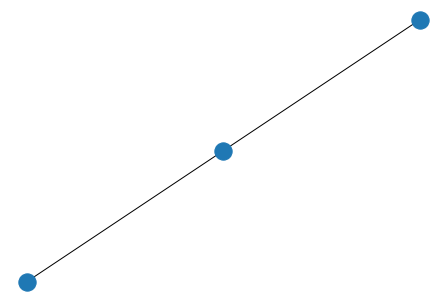

In [19]:
ris = identify(motif1, G0)
liv = 0
mapp = comprimi_rinomina(G0, liv, motif1)
G0 = rinomina_archi(G0)
G0.nodes()
G1 = nx.relabel_nodes(G0, mapp)
nx.draw(G1)

#### MEMORIZZA merge, poter ricostruire e farci indici

In [20]:
# Memorizza [(0, 2), (0, 4), (0, 5)] = (1, 2)

mapping = {1: (0, 1), 2: (0, 2), 3: (0, 3), 4: (0, 2), 5: (0, 2), 6: (0, 6)}
mapping

{1: (0, 1), 2: (0, 2), 3: (0, 3), 4: (0, 2), 5: (0, 2), 6: (0, 6)}

In [21]:
def memo(mapping, n):
    value_occurrences = collections.Counter(mapping.values())
    filtered_dict = {key: value for key, value in mapping.items()
                     if value_occurrences[value] == n}
    new_list = []
    for i, j in filtered_dict.items():
        j = list(j)
        j[1] = i
        j = tuple(j)
        new_list.append(j)
    a = [i for i in new_list[0]]
    a[0] = a[0]+1
    a = tuple(a)
    thisdict = {a: new_list}
    return thisdict

In [22]:
# n fisso a 3 perché graphlet di 3 nodi
memo(mapping, 3)

{(1, 2): [(0, 2), (0, 4), (0, 5)]}

***

#### Indici

In [23]:
G0.nodes()

NodeView((1, 2, 3, 4, 5, 6))

In [24]:
G.nodes()

NodeView(((2, 1), (2, 2)))

**Nodi compressi e nodi mantenuti, count e %**

In [25]:
def nodes_decrease(g_0, g_fin):
    grafo_0 = g_0.nodes()
    [grafo_0]
    grafo_fin = g_fin.nodes()
    [grafo_fin]
    # decrease = grafo_0 - grafo_fin
    decrease = len(grafo_0) - len(grafo_fin)
    # % decrease = decrease ÷ grafo_0 × 100
    decrease_perc = decrease / len(grafo_0) * 100
    # remain = grafo_fin
    remain = len(grafo_fin)
    # remain_perc inverso di decrease_perc
    remain_perc = 100 - decrease_perc
    #remain_perc2 = len(grafo_fin) / len(grafo_0) * 100

    return (decrease, decrease_perc, remain, remain_perc)


nodes_decrease(G0, G)

(4, 66.66666666666666, 2, 33.33333333333334)

**Livelli**

In [28]:
# grafo test di base G

G0 = nx.Graph()
G0.add_edges_from([(1, 2), (2, 3), (2, 4), (2, 5), (4, 5), (3, 6), (4, 6), (5, 6)])
# nx.draw(G)

In [29]:
def rinomina(G):
    livello = 0
    nodi = list(G.nodes())
    lun = len(nodi)
    liv_list = [livello for x in range(lun)]
    lista_tuple = list(zip(liv_list, nodi))
    mapping = dict(zip(nodi, lista_tuple))
    G = nx.relabel_nodes(G, mapping)
    
    return G

G0 = rinomina(G0)
G0.nodes()

NodeView(((0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)))

In [30]:
def funzione(motif, G):
    liv = 1
    lista = []
    while liv < 100:
        ris = identify(motif, G)
        if ris == []:
            break
        else:
            mapping = comprimi_rinomina(G, liv, motif)
            G = rinomina_archi(G)
            G = nx.relabel_nodes(G, mapping)
            # nx.draw(G)
            a = list(G.nodes())
            liv += 1
            lista.append(a)
    return lista

G = funzione(motif, G0)

In [31]:
new = list(G0.nodes())

In [32]:
G.insert(0, new)
G

[[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)],
 [(1, 1), (1, 2), (1, 3), (1, 6)],
 [(2, 1), (2, 2)]]

#### Testare la funzione anche con altri motif

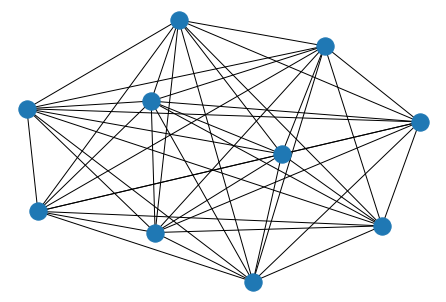

In [36]:
G0 = nx.complete_graph(10, create_using=None)
G0 = rinomina(G0)
nx.draw(G0)

In [37]:
G = funzione(M15, G0)

In [38]:
G

[[(1, 0), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9)], [(2, 0), (2, 9)]]